In [1]:
%matplotlib notebook
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_path = os.path.join("..","Clean_Data")
output_path = os.path.join("..","Graphs")
min_games_played = 20
team = 'HOU'

In [3]:
complete_df = pd.read_csv(input_path +'/total_players.csv')
display(complete_df)

,playerId,nameFull,position,draftTeam,gameId,fumbles,interceptions,sacks,#players-pos-league,#games-pos-league,#fumbles-pos-league,#int-pos-league,#sacks-pos-league
0,20130105.0,Duke Williams,S,BUF,42.0,NaN,2.0,NaN,510.0,37222.0,136.0,2569.0,1044.0
1,20140073.0,Preston Brown,LB,BUF,135.0,NaN,2.0,NaN,1110.0,57793.0,37.0,1119.0,6253.0
2,20110847.0,Corbin Bryant,DE,BUF,43.0,NaN,NaN,10.0,749.0,49751.0,2.0,254.0,11289.0
3,20110818.0,Mario Butler,DB,BUF,6.0,NaN,NaN,NaN,1377.0,69831.0,354.0,4596.0,1065.0
4,20090182.0,Jarius Wynn,DE,BUF,32.0,NaN,NaN,8.0,749.0,49751.0,2.0,254.0,11289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4843,20130054.0,Jamar Taylor,DB,ATL,174.0,NaN,2.0,4.0,1377.0,69831.0,354.0,4596.0,1065.0
4844,20130057.0,D.J. Swearinger,S,NO,145.0,1.0,20.0,6.0,510.0,37222.0,136.0,2569.0,1044.0
4845,20170118.0,Mack Hollins,WR,MIA,2.0,NaN,NaN,NaN,44.0,422.0,121.0,24.0,0.0
4846,20170172.0,Isaiah McKenzie,WR,BUF,2.0,10.0,NaN,NaN,44.0,422.0,121.0,24.0,0.0


In [4]:
players_stats = complete_df[['playerId','nameFull','position','draftTeam','gameId','fumbles','interceptions','sacks']]
players_stats['avg_player_fumbles']=players_stats['fumbles']/players_stats['gameId']
players_stats['avg_player_interceptions']=players_stats['interceptions']/players_stats['gameId']
players_stats['avg_player_sacks']=players_stats['sacks']/players_stats['gameId']
players_stats = players_stats[['playerId','nameFull','position','draftTeam','gameId','avg_player_fumbles','avg_player_interceptions','avg_player_sacks']]
players_stats = players_stats.rename(columns={'gameId':'games_played','draftTeam':'Team'})
players_stats = players_stats.dropna(how='all').drop_duplicates(subset='nameFull',keep='last')
display(players_stats)
players_stats.to_csv("../../player_stats.csv",index=False,header=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,playerId,nameFull,position,Team,games_played,avg_player_fumbles,avg_player_interceptions,avg_player_sacks
0,20130105.0,Duke Williams,S,BUF,42.0,NaN,0.047619,NaN
3,20110818.0,Mario Butler,DB,BUF,6.0,NaN,NaN,NaN
4,20090182.0,Jarius Wynn,DE,BUF,32.0,NaN,NaN,0.250000
6,20120578.0,Bobby Felder,DB,BUF,6.0,NaN,NaN,NaN
9,20100166.0,Stevenson Sylvester,LB,BUF,6.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4843,20130054.0,Jamar Taylor,DB,ATL,174.0,NaN,0.011494,0.022989
4844,20130057.0,D.J. Swearinger,S,NO,145.0,0.006897,0.137931,0.041379
4845,20170118.0,Mack Hollins,WR,MIA,2.0,NaN,NaN,NaN
4846,20170172.0,Isaiah McKenzie,WR,BUF,2.0,5.000000,NaN,NaN


In [5]:
by_position_graphs = players_stats[players_stats['games_played']>=min_games_played]
by_position_graphs = by_position_graphs.groupby('position').mean().reset_index()
by_position_graphs = by_position_graphs[['position','avg_player_fumbles','avg_player_interceptions','avg_player_sacks']]
avg_league_interceptions = by_position_graphs['avg_player_interceptions'].mean()
avg_league_fumbles = by_position_graphs['avg_player_fumbles'].mean()
avg_league_sacks = by_position_graphs['avg_player_sacks'].mean()
by_position_graphs['avg_league_fumbles'] = avg_league_fumbles
by_position_graphs['avg_league_interceptions'] = avg_league_interceptions
by_position_graphs['avg_league_sacks'] = avg_league_sacks
display(by_position_graphs)
by_position_graphs.to_csv("../../by_position_graphs.csv",index=False,header=True)

,position,avg_player_fumbles,avg_player_interceptions,avg_player_sacks,avg_league_fumbles,avg_league_interceptions,avg_league_sacks
0,DB,0.051005,0.097878,0.052577,0.023623,0.0643,0.157115
1,DE,0.031250,0.032428,0.262639,0.023623,0.0643,0.157115
2,DL,0.010417,0.029825,0.125271,0.023623,0.0643,0.157115
3,DT,0.027864,0.036155,0.140783,0.023623,0.0643,0.157115
4,LB,0.021761,0.057427,0.143952,0.023623,0.0643,0.157115
5,OG,NaN,NaN,0.173913,0.023623,0.0643,0.157115
6,OLB,0.023256,0.065630,0.167085,0.023623,0.0643,0.157115
7,OT,0.009174,NaN,0.284404,0.023623,0.0643,0.157115
8,S,0.018814,0.094413,0.063409,0.023623,0.0643,0.157115
9,WR,0.019071,0.100641,NaN,0.023623,0.0643,0.157115


<IPython.core.display.Javascript object>


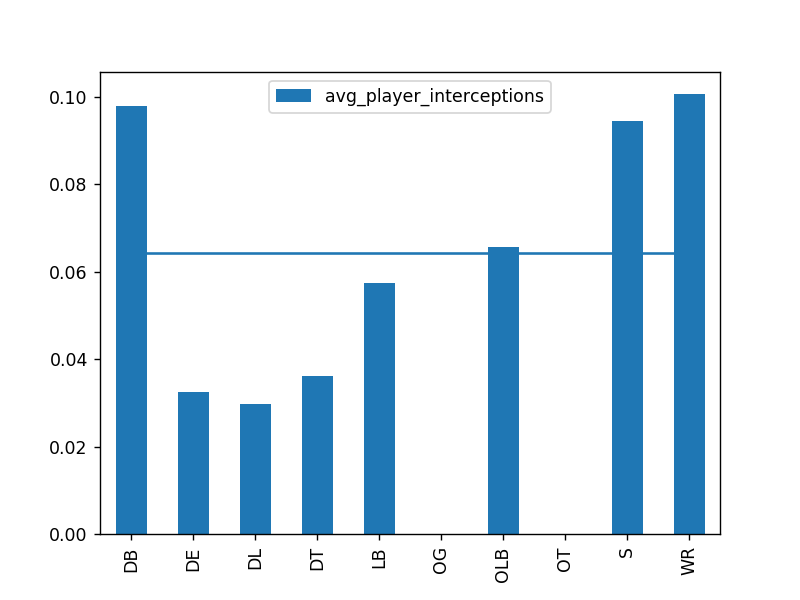

In [6]:
width=0.5
by_position_graphs[['avg_player_interceptions']].plot(kind='bar', width =width)
by_position_graphs['avg_league_interceptions'].plot()

ax = plt.gca()
plt.xlim([-width, len(by_position_graphs['position'])-width])
ax.set_xticklabels(by_position_graphs['position'],rotation=90)
plt.show()

<IPython.core.display.Javascript object>


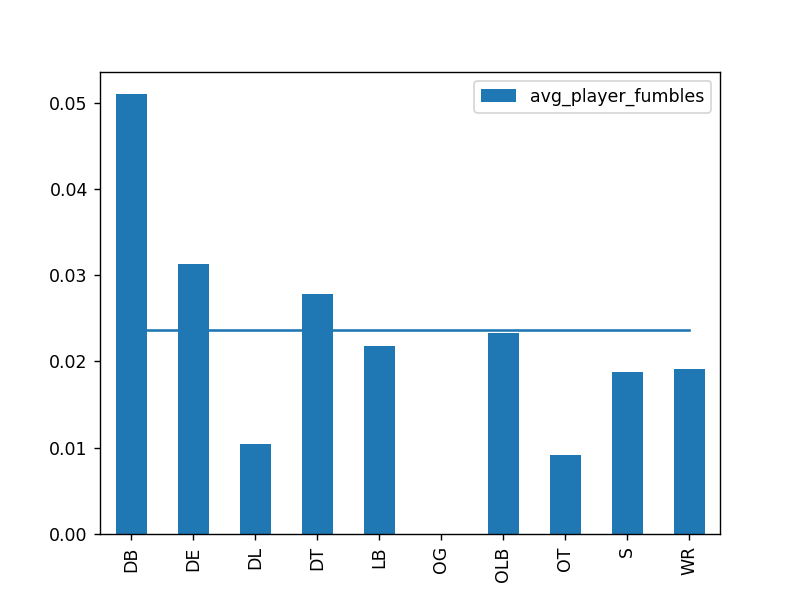

In [7]:
width=0.5
by_position_graphs[['avg_player_fumbles']].plot(kind='bar', width =width)
by_position_graphs['avg_league_fumbles'].plot()

ax = plt.gca()
plt.xlim([-width, len(by_position_graphs['position'])-width])
ax.set_xticklabels(by_position_graphs['position'],rotation=90)
plt.show()

<IPython.core.display.Javascript object>


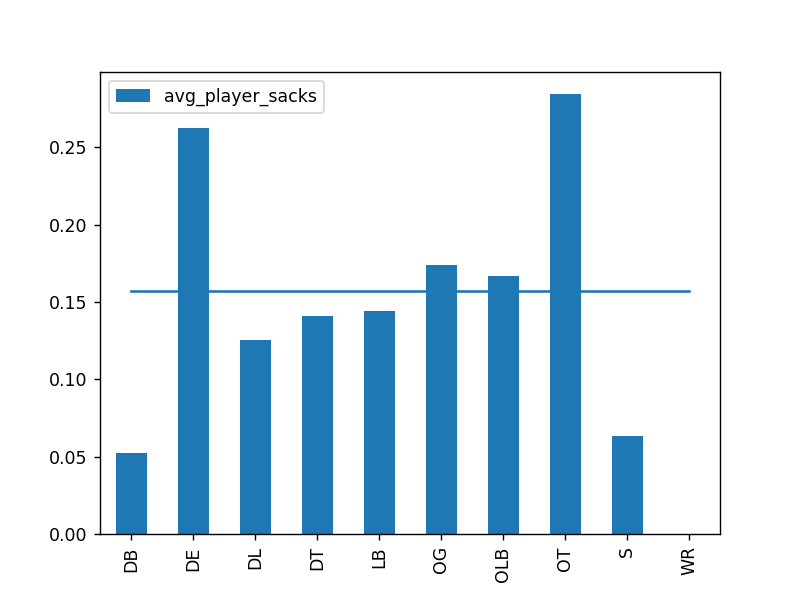

In [8]:
width=0.5
by_position_graphs[['avg_player_sacks']].plot(kind='bar', width =width)
by_position_graphs['avg_league_sacks'].plot()

ax = plt.gca()
plt.xlim([-width, len(by_position_graphs['position'])-width])
ax.set_xticklabels(by_position_graphs['position'],rotation=90)
plt.show()

In [9]:
positions_to_compare = 3
plays = ['fumbles','interceptions','sacks']
lists = []
for play in plays:
    globals()['positions_%s' % play] = by_position_graphs[['position',f'avg_player_{play}',f'avg_league_{play}']]
    globals()['positions_%s' % play]['difference'] = globals()['positions_%s' % play][f'avg_player_{play}']-globals()['positions_%s' % play][f'avg_league_{play}']
    globals()['positions_%s' % play] = globals()['positions_%s' % play][['position','difference']].sort_values(by='difference',ascending=False).reset_index()
    globals()['important_positions_%s' % play] = globals()['positions_%s' % play].head(3).drop(columns={'index'})
    lists.append(globals()['important_positions_%s' % play])
    display(globals()['important_positions_%s' % play])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,position,difference
0,DB,0.027381
1,DE,0.007627
2,DT,0.004240


,position,difference
0,WR,0.036341
1,DB,0.033579
2,S,0.030113


,position,difference
0,OT,0.127289
1,DE,0.105524
2,OG,0.016798


In [10]:
results = []
for lista in lists:
    if lista.equals(important_positions_fumbles):
        table = "fumbles"
    elif lista.equals(important_positions_interceptions):
        table = "interceptions"
    elif lista.equals(important_positions_sacks):
        table = "sacks"
    pos1=lista['position'][0]
    pos2=lista['position'][1]
    pos3=lista['position'][2]
    team_player_stats = players_stats[(players_stats['Team']==team)&(players_stats['games_played']>=min_games_played)&((players_stats['position']==pos1)|(players_stats['position']==pos2)|(players_stats['position']==pos3))]
#     display(team_player_stats.head())
    team_player_stats = team_player_stats[['position',f'avg_player_{table}']]
    team_player_stats = team_player_stats.rename(columns={f'avg_player_{table}':f'avg_team_{table}'})
#     display(team_player_stats.head())
    globals()['by_position_team_graphs_%s' % table] =  team_player_stats[['position',f'avg_team_{table}']]
#     display(globals()['by_position_team_graphs_%s' % table])
    globals()['by_position_team_graphs_%s' % table] = globals()['by_position_team_graphs_%s' % table].groupby('position').mean().reset_index()
#     display(globals()['by_position_team_graphs_%s' % table])
    globals()['by_position_team_graphs_%s' % table] = pd.DataFrame.merge(lista,globals()['by_position_team_graphs_%s' % table],how='left',on='position')
    globals()['by_position_team_graphs_%s' % table] = pd.DataFrame.merge(globals()['by_position_team_graphs_%s' % table],by_position_graphs[['position',f'avg_player_{table}']]).drop(columns={'difference'})
    globals()['by_position_team_graphs_%s' % table] = globals()['by_position_team_graphs_%s' % table].rename(columns={f'avg_player_{table}':f'avg_league_{table}'})
    display(globals()['by_position_team_graphs_%s' % table])
    results.append(globals()['by_position_team_graphs_%s' % table])
    
    print("\n-----------------------------------------------------------------------------------------------------------------------\n")

,position,avg_team_fumbles,avg_league_fumbles
0,DB,0.019231,0.051005
1,DE,NaN,0.031250
2,DT,NaN,0.027864



-----------------------------------------------------------------------------------------------------------------------



,position,avg_team_interceptions,avg_league_interceptions
0,WR,NaN,0.100641
1,DB,0.048411,0.097878
2,S,0.062792,0.094413



-----------------------------------------------------------------------------------------------------------------------



,position,avg_team_sacks,avg_league_sacks
0,OT,NaN,0.284404
1,DE,0.107744,0.262639
2,OG,NaN,0.173913



-----------------------------------------------------------------------------------------------------------------------



<IPython.core.display.Javascript object>


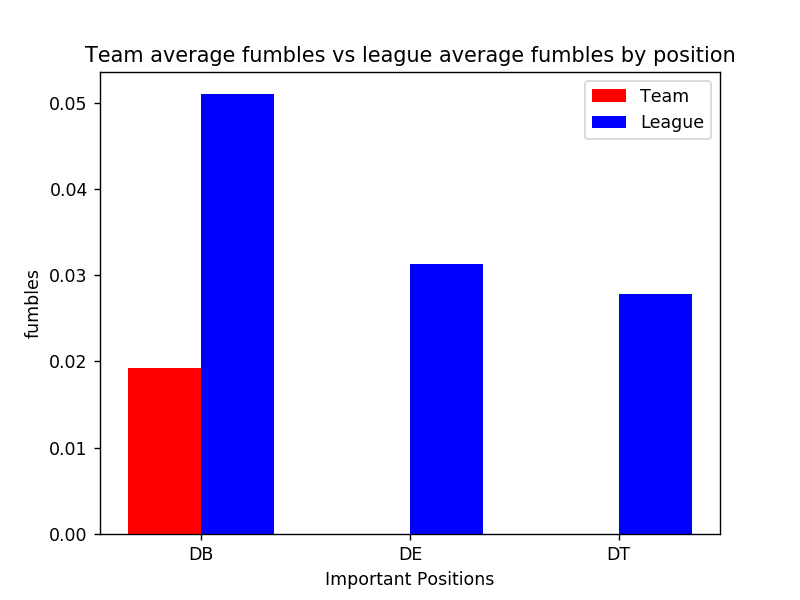

<IPython.core.display.Javascript object>


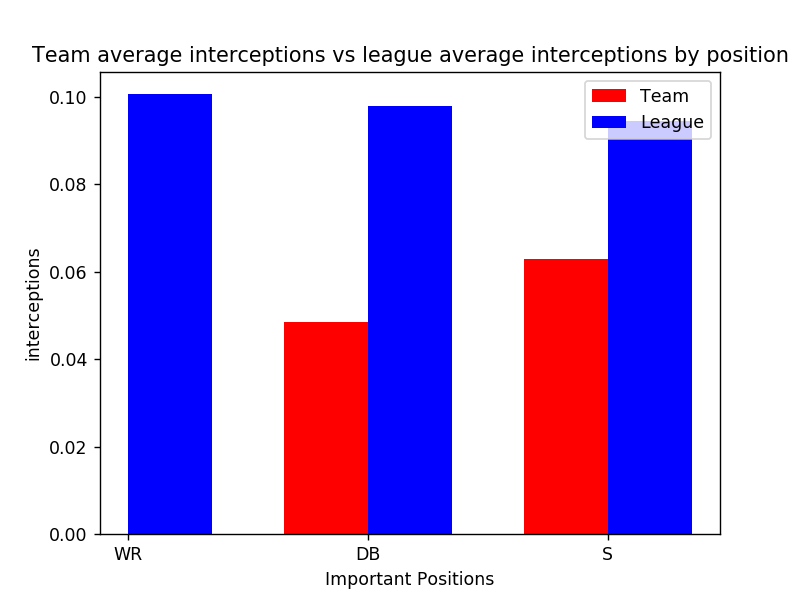

<IPython.core.display.Javascript object>


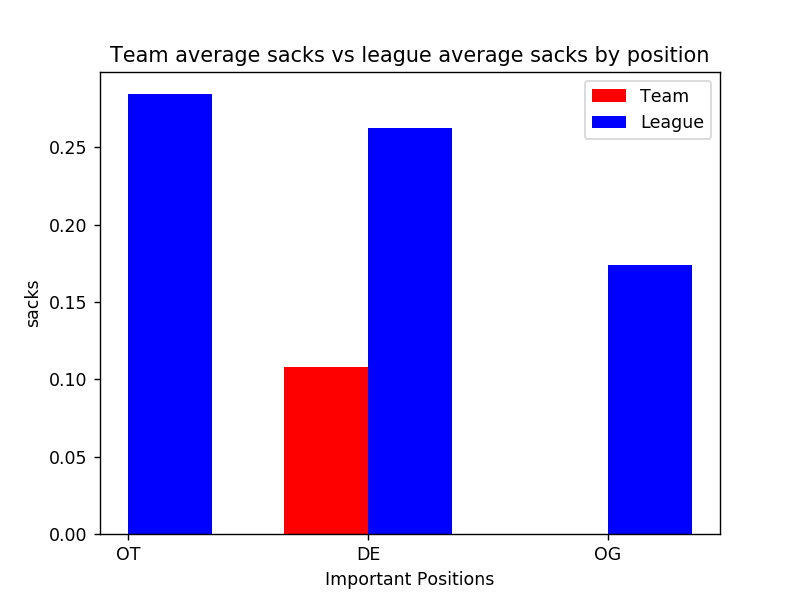

In [11]:
for result in results:
    if result.equals(by_position_team_graphs_fumbles):
        table = "fumbles"
    elif result.equals(by_position_team_graphs_interceptions):
        table = "interceptions"
    elif result.equals(by_position_team_graphs_sacks):
        table = "sacks"
    x = np.arange(len(globals()['by_position_team_graphs_%s' % table]['position']))  # the x locations for the groups
    width = 0.35       # the width of the bars

    fig, ax = plt.subplots()
    team = ax.bar(x - width/2, globals()['by_position_team_graphs_%s' % table][f'avg_team_{table}'], width,label='Team',color='r')
    league = ax.bar(x + width/2, globals()['by_position_team_graphs_%s' % table][f'avg_league_{table}'], width,label='League',color='b')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(f'{table}')
    ax.set_title(f'Team average {table} vs league average {table} by position')
    ax.set_xticks(x)
    ax.set_xticklabels(globals()['by_position_team_graphs_%s' % table]['position'])
    ax.set_xlabel('Important Positions')
    ax.legend()

In [12]:
positions_to_compare = 1
critical_positions = []
for result in results:
    if result.equals(by_position_team_graphs_fumbles):
        table = "fumbles"
    elif result.equals(by_position_team_graphs_interceptions):
        table = "interceptions"
    elif result.equals(by_position_team_graphs_sacks):
        table = "sacks"
    globals()['by_position_team_graphs_%s' % table][f'{table}_difference'] = globals()['by_position_team_graphs_%s' % table][f'avg_team_{table}'].fillna(0) - globals()['by_position_team_graphs_%s' % table][f'avg_league_{table}']
    globals()['by_position_team_graphs_%s' % table] = globals()['by_position_team_graphs_%s' % table][['position',f'{table}_difference']].sort_values(by=f'{table}_difference').reset_index()
    
    display(globals()['by_position_team_graphs_%s' % table])
    critical_positions.append(globals()['by_position_team_graphs_%s' % table]['position'][0])
plays=['fumbles','interceptions','sacks']
recommendations = pd.DataFrame(list(zip(plays, critical_positions)),columns =['Plays', 'Positions']) 
display(recommendations)

,index,position,fumbles_difference
0,0,DB,-0.031774
1,1,DE,-0.031250
2,2,DT,-0.027864


,index,position,interceptions_difference
0,0,WR,-0.100641
1,1,DB,-0.049467
2,2,S,-0.031621


,index,position,sacks_difference
0,0,OT,-0.284404
1,2,OG,-0.173913
2,1,DE,-0.154895


,Plays,Positions
0,fumbles,DB
1,interceptions,WR
2,sacks,OT


In [15]:
for x in range(0,3):
    position = recommendations['Positions'][x]
    play = recommendations['Plays'][x]
    recommended_players = players_stats[(players_stats['games_played']>=min_games_played)&(players_stats['Team']!=team)&(players_stats['position']==position)]
    recommended_players = recommended_players[['playerId','nameFull','Team','position','games_played',f'avg_player_{play}']].sort_values(by=f'avg_player_{play}',ascending=False)
    actual_players = players_stats[(players_stats['games_played']>=min_games_played)&(players_stats['Team']==team)&(players_stats['position']==position)]
    actual_players = actual_players[['playerId','nameFull','Team','position','games_played',f'avg_player_{play}']].sort_values(by=f'avg_player_{play}',ascending=False)
    display(recommended_players.head(3))
    display(actual_players.head(3))

,playerId,nameFull,Team,position,games_played,avg_player_fumbles
1507,20100678.0,Marcus Sherels,MIN,DB,23.0,0.695652
1580,20080011.0,Leodis McKelvin,BUF,DB,24.0,0.416667
2866,20170165.0,Jamal Agnew,DET,DB,21.0,0.333333


,playerId,nameFull,Team,position,games_played,avg_player_fumbles


,playerId,nameFull,Team,position,games_played,avg_player_interceptions
2169,20150568.0,Quinton Dunbar,WAS,WR,80.0,0.150000
4265,20140990.0,C.J. Goodwin,DAL,WR,39.0,0.051282


,playerId,nameFull,Team,position,games_played,avg_player_interceptions


,playerId,nameFull,Team,position,games_played,avg_player_sacks
859,20060606.0,Tom Johnson,MIN,OT,109.0,0.284404


,playerId,nameFull,Team,position,games_played,avg_player_sacks
